In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gensim
print(gensim.__version__)

4.3.3


In [3]:
import gensim
import os
from gensim.utils import simple_preprocess

doc = open('sample_data.txt', encoding ='utf-8')
tokenized =[]
for sentence in doc.read().split('.'):
  tokenized.append(simple_preprocess(sentence, deacc = True))
print(tokenized)

[['data', 'science', 'is', 'an', 'field', 'that', 'uses', 'scientific', 'methods'], ['machine', 'learning', 'allows', 'systems', 'to', 'learn', 'automatically', 'from', 'data'], ['natural', 'language', 'processing', 'helps', 'machines', 'understand', 'human', 'language'], ['deep', 'learning', 'is', 'subset', 'of', 'machine', 'learning', 'based', 'on', 'neural', 'networks'], ['big', 'data', 'technologies', 'handle', 'massive', 'volumes', 'of', 'information', 'efficiently'], []]


In [4]:
from gensim import corpora

my_dictionary = corpora.Dictionary(tokenized)
print(my_dictionary)

Dictionary<38 unique tokens: ['an', 'data', 'field', 'is', 'methods']...>


word2vec using matrix multiplication to assign vector value to the word as [000100] with [001010]=[101011] whereas tfidf uses tf and idf to assign the vector value.

lemmatization is done before tf idf vectorization and count vectorizer method works similarly as term frequency method


for n gram is 1 as [1,1] then result size of vector list will be in same as the no of word.when n gram=[2,2] then size of word vector list will be reduced to -1.when [3,3] then vector size of resultant list willbe reduced to -2.

basic nlp isl+nlp and deep nlp is dl+ml+nlp.

cosine similarity:

take three words [[india][beats][newzealand]]this is 1*3 matrix it is a list which contains 1*3 word tokenized.when we apply word2vec it becomes *3 matrix and vectors assigned as india with india as 1 and india with beats as 0.2 so
[1 0.2 0.5
0.2 1 0.6
0.5 0.6 1]
this is 3*3 matrixvectors and this is how word2vec works with cosine similarity.

note if the lemmatized word is not in deep nlp models such as bert and excelnet model which are large corus of engish dictionary which is already built then the unavailable word in that corpus wont get assigned any vectors.

model is an algorithm used for transforming one representation of vector to another vector.

Soft Cosine Measure
Demonstrates using Gensim’s implemenation of the SCM.

Soft Cosine Measure (SCM) is a promising new tool in machine learning that allows us to submit a query and return the most relevant documents. This tutorial introduces SCM and shows how you can compute the SCM similarities between two documents 

Soft Cosine Measure basics
Soft Cosine Measure (SCM) is a method that allows us to assess the similarity between two documents in a meaningful way, even when they have no words in common. It uses a measure of similarity between words, which can be derived [2] using [word2vec][] [4] vector embeddings of words. It has been shown to outperform many of the state-of-the-art methods in the semantic text similarity task in the context of community question answering

SCM is illustrated below for two very similar sentences. The sentences have no words in common, but by modeling synonymy, SCM is able to accurately measure the similarity between the two sentences. The method also uses the bag-of-words vector representation of the documents (simply put, the word’s frequencies in the documents). The intution behind the method is that we compute standard cosine similarity assuming that the document vectors are expressed in a non-orthogonal basis, where the angle between two basis vectors is derived from the angle between the word2vec embeddings of the corresponding words.

PIL stands for Python Imaging Library — it is a library in Python for opening, manipulating, and saving many different image file formats (like .png, .jpg, .gif, etc.).



The original PIL project is no longer maintained.

Instead, we use its modern fork called Pillow, which is fully backward compatible with PIL.

pip install pillow

This method was perhaps first introduced in the article “Soft Measure and Soft Cosine Measure: Measure of Features in Vector Space Model” 

Let’s take some sentences to compute the distance between.

In [2]:
# Initialize logging.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_orange = 'Oranges are my favorite fruit'

The first two sentences sentences have very similar content, and as such the SCM should be high. By contrast, the third sentence is unrelated to the first two and the SCM should be low.

Before we compute the SCM, we want to remove stopwords (“the”, “to”, etc.), as these do not contribute a lot to the information in the sentences.

In [3]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)
sentence_orange = preprocess(sentence_orange)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, we will build a dictionary and a TF-IDF model, and we will convert the sentences to the bag-of-words format.

In [4]:
from gensim.corpora import Dictionary
documents = [sentence_obama, sentence_president, sentence_orange]
dictionary = Dictionary(documents)

sentence_obama = dictionary.doc2bow(sentence_obama)
sentence_president = dictionary.doc2bow(sentence_president)
sentence_orange = dictionary.doc2bow(sentence_orange)

from gensim.models import TfidfModel
documents = [sentence_obama, sentence_president, sentence_orange]
tfidf = TfidfModel(documents)

sentence_obama = tfidf[sentence_obama]
sentence_president = tfidf[sentence_president]
sentence_orange = tfidf[sentence_orange]

2025-07-16 12:33:45,117 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-16 12:33:45,119 : INFO : built Dictionary<11 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 3 documents (total 11 corpus positions)
2025-07-16 12:33:45,121 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<11 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 3 documents (total 11 corpus positions)", 'datetime': '2025-07-16T12:33:45.120130', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-16 12:33:45,122 : INFO : collecting document frequencies
2025-07-16 12:33:45,123 : INFO : PROGRESS: processing document #0
2025-07-16 12:33:45,126 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 3 documents and 11 features (11 matrix non-zeros)', 'datetime': '2025-07-16T12:33

Now, as mentioned earlier, we will be using some downloaded pre-trained embeddings. We load these into a Gensim Word2Vec model class and we build a term similarity mextrix using the embeddings.
The embeddings we have chosen here require a lot of memory.

In [5]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex
termsim_index = WordEmbeddingSimilarityIndex(model)
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf)

2025-07-16 12:49:46,394 : INFO : loading projection weights from C:\Users\Welcome/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2025-07-16 12:52:08,744 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\Welcome/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-07-16T12:52:08.728960', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'load_word2vec_format'}
2025-07-16 12:52:08,837 : INFO : constructing a sparse term similarity matrix using WordEmbeddingSimilarityIndex<keyedvectors=KeyedVectors<vector_size=300, 3000000 keys>, threshold=0.0, exponent=2.0, kwargs={}>
2025-07-16 12:52:08,874 : INFO : iterating over 11 columns in tf-idf order
100%|██████████| 11/11 [02:14<00:00, 12.25s/it]
2025-07-16 12:54:24,793 : INFO :

So let’s compute SCM using the inner_product method.

You're building a term similarity matrix using Word2Vec word embeddings (from Google's pre-trained model) and TF-IDF vectors, to calculate semantic similarity between terms in documents.

gensim.downloader is a module that allows you to download pre-trained models easily.

'word2vec-google-news-300' is a pre-trained Word2Vec model trained on Google News (about 100 billion words).

The 300 means each word is represented as a 300-dimensional vector.

model is now a KeyedVectors object containing word embeddings.

WordEmbeddingSimilarityIndex: wraps the model so it can be used in similarity calculations.

SparseTermSimilarityMatrix: creates a matrix of pairwise similarities between all terms in your dictionary.

This wraps the Word2Vec model into a format that can calculate similarity between words.

You now have a "word similarity calculator" (termsim_index) that uses the Word2Vec model under the hood.



Here's what's happening:

SparseTermSimilarityMatrix(...) creates a term-by-term similarity matrix, where the similarity is semantic (based on Word2Vec), not just raw frequency.

Parameters:

termsim_index: calculates similarity between any two words using embeddings.

dictionary: a gensim.corpora.Dictionary mapping of your vocabulary (e.g., {0: 'apple', 1: 'orange'...}).

tfidf: a TfidfModel object (created using gensim.models.TfidfModel(corpus)), needed because it determines which words actually occur in your corpus.


The matrix this creates is typically used for soft cosine similarity between documents or terms.

model = api.load(...)	Loads pre-trained word embeddings
termsim_index = WordEmbeddingSimilarityIndex(...)	Wraps model to compute word similarities
termsim_matrix = SparseTermSimilarityMatrix(...)	Creates a term similarity matrix using the above and TF-IDF

In [7]:
similarity = termsim_matrix.inner_product(sentence_obama, sentence_president, normalized=(True, True))
print('similarity = %.4f' % similarity)

similarity = 0.2575


Let’s try the same thing with two completely unrelated sentences. Notice that the similarity is smaller.

In [8]:
similarity = termsim_matrix.inner_product(sentence_obama, sentence_orange, normalized=(True, True))
print('similarity = %.4f' % similarity)

similarity = 0.0000


In [9]:
# Step 1: Import required libraries
import gensim
from gensim import corpora
from gensim.models import TfidfModel
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex, SoftCosineSimilarity
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Step 2: Sample corpus
documents = [
    "Cats are beautiful animals.",
    "Dogs are faithful and friendly pets.",
    "I love my pet cat.",
    "My dog is the best companion.",
    "Animals like dogs and cats are very loyal."
]


In [11]:
# Step 3: Preprocess the text (tokenization + stopword removal)
def preprocess(doc):
    return [word for word in simple_preprocess(doc) if word not in stop_words]

corpus_tokenized = [preprocess(doc) for doc in documents]


In [12]:
# Step 4: Create Dictionary and Corpus
dictionary = corpora.Dictionary(corpus_tokenized)
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus_tokenized]
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = [tfidf[doc] for doc in bow_corpus]


2025-07-16 13:14:29,196 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-07-16 13:14:29,199 : INFO : built Dictionary<15 unique tokens: ['animals', 'beautiful', 'cats', 'dogs', 'faithful']...> from 5 documents (total 18 corpus positions)
2025-07-16 13:14:29,201 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<15 unique tokens: ['animals', 'beautiful', 'cats', 'dogs', 'faithful']...> from 5 documents (total 18 corpus positions)", 'datetime': '2025-07-16T13:14:29.201555', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-07-16 13:14:29,204 : INFO : collecting document frequencies
2025-07-16 13:14:29,209 : INFO : PROGRESS: processing document #0
2025-07-16 13:14:29,211 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 5 documents and 15 features (18 matrix non-zeros)', 'datetime': '2025-07-16T13:

In [13]:
# Step 5: Load pre-trained word2vec embeddings
model = api.load("word2vec-google-news-300")


2025-07-16 13:14:47,637 : INFO : loading projection weights from C:\Users\Welcome/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2025-07-16 13:16:29,308 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\Welcome/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-07-16T13:16:29.308587', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'load_word2vec_format'}


In [14]:
# Step 6: Create term similarity matrix
termsim_index = WordEmbeddingSimilarityIndex(model)
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf)


2025-07-16 13:20:00,548 : INFO : constructing a sparse term similarity matrix using WordEmbeddingSimilarityIndex<keyedvectors=KeyedVectors<vector_size=300, 3000000 keys>, threshold=0.0, exponent=2.0, kwargs={}>
2025-07-16 13:20:00,553 : INFO : iterating over 15 columns in tf-idf order
100%|██████████| 15/15 [01:53<00:00,  7.54s/it]
2025-07-16 13:21:53,635 : INFO : constructed a sparse term similarity matrix with 25.333333% density


In [15]:
# Step 7: Build soft cosine similarity index
similarity_index = SoftCosineSimilarity(tfidf_corpus, termsim_matrix)


In [16]:
# Step 8: Compare a new query with all documents
query = "My pet is loyal and friendly"
query_tokens = preprocess(query)
query_bow = dictionary.doc2bow(query_tokens)
query_tfidf = tfidf[query_bow]

similarities = similarity_index[query_tfidf]
#comparing similarity between new document and already created document

In [17]:
# Step 9: Display similarity results
for i, score in enumerate(similarities):
    print(f"Similarity with Document {i+1}: {score:.4f}")


Similarity with Document 1: 0.2602
Similarity with Document 2: 0.6050
Similarity with Document 3: 0.4958
Similarity with Document 4: 0.2964
Similarity with Document 5: 0.5550


These scores indicate how semantically similar your query is to each document, even when words aren’t exactly the same (e.g., "loyal" and "faithful").



Let me know if you want to:

Visualize the similarities

Use your own documents

Save the model and matrix

Use a lighter Word2Vec model (to save memory)

1. Use your own documents
Replace the sample documents list with your own texts:



In [18]:
documents = [
    "Your first document goes here.",
    "Another one with different content.",
    "Add as many documents as needed."
]


2. Save the TF-IDF model and Dictionary
You can save and reload the TF-IDF model and dictionary like this:

In [19]:
# Save
dictionary.save('my_dictionary.dict')
tfidf.save('my_tfidf_model.tfidf')

# Load later
# from gensim import corpora, models
# dictionary = corpora.Dictionary.load('my_dictionary.dict')
# tfidf = models.TfidfModel.load('my_tfidf_model.tfidf')


2025-07-16 13:36:40,134 : INFO : Dictionary lifecycle event {'fname_or_handle': 'my_dictionary.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-07-16T13:36:40.134013', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'saving'}
2025-07-16 13:36:40,155 : INFO : saved my_dictionary.dict
2025-07-16 13:36:40,156 : INFO : TfidfModel lifecycle event {'fname_or_handle': 'my_tfidf_model.tfidf', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-07-16T13:36:40.156631', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'saving'}
2025-07-16 13:36:40,164 : INFO : saved my_tfidf_model.tfidf


Save the Word2Vec model index (optional – very large!)
Note: word2vec-google-news-300 is ~1.5GB and cannot be saved via model.save() if loaded from Gensim API directly.

If you want a lighter model, see step 5 below.

Visualize similarity matrix with heatmap
Refer tfidf_corpus in above code

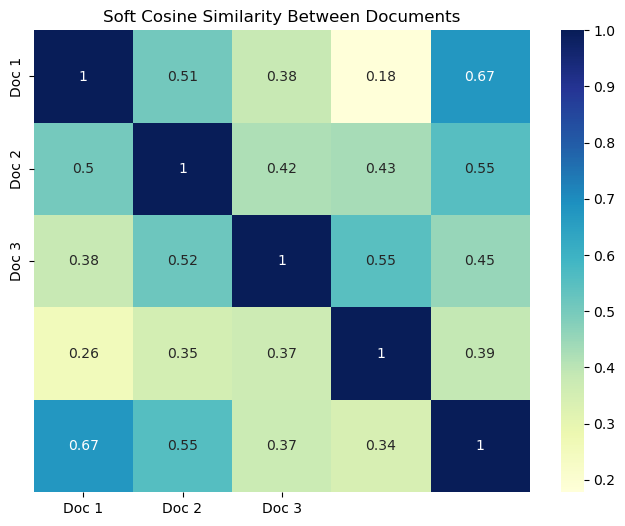

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Similarity matrix
sim_matrix = []
for doc_tfidf in tfidf_corpus:
    row = similarity_index[doc_tfidf]
    sim_matrix.append(row)

# Convert to NumPy array
sim_matrix = np.array(sim_matrix)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(sim_matrix, annot=True, cmap="YlGnBu", xticklabels=[f'Doc {i+1}' for i in range(len(documents))],
            yticklabels=[f'Doc {i+1}' for i in range(len(documents))])
plt.title("Soft Cosine Similarity Between Documents")
plt.show()


Use a lighter Word2Vec model
Instead of word2vec-google-news-300, try:

In [21]:
model = api.load("glove-wiki-gigaword-100")


[==================--------------------------------] 37.6% 48.1/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.8% 76.6/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.3% 109.3/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 128.1/128.1MB downloaded


2025-07-16 14:13:58,469 : INFO : glove-wiki-gigaword-100 downloaded
2025-07-16 14:13:58,519 : INFO : loading projection weights from C:\Users\Welcome/gensim-data\glove-wiki-gigaword-100\glove-wiki-gigaword-100.gz
2025-07-16 14:14:30,391 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 100) matrix of type float32 from C:\\Users\\Welcome/gensim-data\\glove-wiki-gigaword-100\\glove-wiki-gigaword-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-07-16T14:14:30.391873', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'load_word2vec_format'}


It’s much smaller (~128MB) and faster.



Save SoftCosine index (optional)

In [22]:
from gensim.similarities import Similarity

# Use Similarity class (works with normal cosine, not soft cosine) if saving
similarity_index.save('soft_cosine_index.index')

# Load it later
# similarity_index = Similarity.load('soft_cosine_index.index')


2025-07-16 14:18:04,951 : INFO : SoftCosineSimilarity lifecycle event {'fname_or_handle': 'soft_cosine_index.index', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-07-16T14:18:04.951638', 'gensim': '4.3.3', 'python': '3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'saving'}
2025-07-16 14:18:04,953 : INFO : saved soft_cosine_index.index


Unfortunately, Gensim doesn't yet support saving the full SoftCosineSimilarity object directly.